# Introducción a las menciones II
## Módulo Computación Científica

### Prof. Cristian Barrera Hinojosa
### cristian.barrera@uv.cl

#### Clases disponibles en:
https://crisbh.github.io/intro_menciones_II/clases.html 

# Programa del curso

1. Métodos de simulaciones
2. Analisis de datos
3. Machine learning
4. Visualizaciones
5. Caso de estudio: orbitas
6. Caso de estudio: red neuronal artificial

# Métodos de las simulaciones

Durante la última clase del semestre pasado hablamos sobre la **utilidad** de las simulaciones computacionales y algunos ejemplos.

Ahora veremos las **técnicas** que uno se usa para crear simulaciones.

En general, las simulaciones:

* Buscan reproducir algún aspecto de nuestro Universo.
* Por lo tanto, se tratan de sistemas que se mueven a través del espacio y el tiempo.

Por lo tanto, el primer desafío es: ¿cómo podemos representar el espacio y el tiempo en un computador?

Normalmente pensamos que el espacio y el tiempo son *continuas* (aunque a un nivel cuántico, eso podría ser incorrecto...)

No podemos representar continuidad exactamente en un computador, por su memoria finita.

Como ejemplo, considere una parte de la línea de los números reales:

![](clase1_imagenes/real_numbers.png)

Hay un número infinito de números entre cualquier par de números en la línea. Por la memoria finita de un computador, es imposible representar todos estos números. Por lo tanto, es imposible representar, en forma exacta, el concepto de *continuidad*.

#### Discretización del espacio y el tiempo

Por esa razón, hay que representar el espacio y el tiempo en una forma *discreta* (en trozos, y no continua).

Es como considerar solamente los números enteros en la línea de números reales.

Además, el "universo" o "dominio" de la simulación tiene que ser *finito*. Muchas veces este "dominio" se llama la "caja computacional".

Un poco de jerga:

* Pasos del tiempo (timesteps): los valores discretos del tiempo en la simulación.
* Resolución: número de valores en el espacio y/o el tiempo que ocupamos en la simulación.

    * Una simulación con más puntos en el espacio (para el mismo tamaño total de la simulación) tiene mejor resolución espacial.
    * Con más puntos en el tiempo (para el mismo intervalo total del tiempo) tiene más resolución temporal.


Un ejemplo sería el *Juego de la vida*:

![](clase1_imagenes/gameoflife.png)

* El espacio está discretizado: las células tienen posiciones específicas.
* El tiempo tembién está discretizado: cada paso de tiempo tenemos una nueva generación de células vivas.
* También el "universo" o "dominio" de la simulación es finito.

## Un ejemplo de la física: un oscilador armónico simple

Según la mecánica Newtoniana, la posición de una partícula en una dimensión está dada por $x(t)$, que satisface la Segunda Ley de Newton:

$$m\frac{d^2x}{dt^2} = F(x,t)$$

donde $F(x,t)$ es la fuerza y $m$ es la masa. Podemos hacer una simulación del movimiento de la partícula (es decir, podemos resolver la ecuación diferencial numéricamente).

### Pero primero: ¿qué es una ecuación diferencial?

Consideremos el caso de un oscilador ármonico simple:

![](clase1_imagenes/harmonic.png)

En este sistema, la fuerza es $F = -kx$. Por lo tanto la ecuación que tenemos que resolver es

$$\frac{d^2x}{dt^2} = -\frac{k}{m}x$$

Buscamos la posición como función del tiempo: $x(t)$.

En Python, hay una función del módulo *SciPy* que puede resolver ecuaciones diferenciales. 

Este funciona con ecuaciones diferenciales de *primer* orden, no de *segundo* orden (como lo que tenemos arriba). Pero es fácil convertir la ecuación en dos ecuaciones de primer orden:

$$\frac{dx}{dt} = v$$

$$\frac{dv}{dt} = -\frac{k}{m}x$$

Estas son las ecuaciones que vamos a resolver con Python.

In [1]:
%pylab inline
from scipy import integrate

Populating the interactive namespace from numpy and matplotlib


Definimos los lados derechos de las ecuaciones arriba como una función de Python.

El primer argumento a la función será una lista `Y` de dos elementos. El primer elemento `Y[0]` es un valor de $v$, y el segundo elemento `Y[1]` es un valor de $x$.

In [2]:
def ecuaciones(Y, t, k, m):
    x, v = Y
    return [v, -(k/m)*x]

Ahora vamos a elegir los momentos en tiempo que queremos calcular. Creamos un arreglo de valores en el tiempo con el uso de `linspace`.

In [3]:
tiempo = linspace(0,25,100)

Definimos el valor de $k$, la constante del resorte, y la masa $m$. También necesitamos las *condiciones iniciales*: los valores de $x$ y $v$ en el momento $t=0$.

Las unidades de $k$ son kg m/s$^2$. Entonces, si la masa está en kg, las posiciones están en metros, y tiempo está en segundos.

In [4]:
k = 1.0
m = 1.0
x0 = 0.0
v0 = 1.0

Para resolver las ecuaciones (es decir, integrarlas) vamos a ocupar la función `odeint` del submódulo `integrate` de *SciPy*.

In [5]:
solucion = integrate.odeint(ecuaciones, [x0, v0], tiempo, args=(k,m))

In [6]:
solucion.shape

(100, 2)

Tenemos una solución numérica a la ecuación diferencial que describe el sistema. Los valores en la primera columna del arreglo `solucion` son los valores de $x(t)$ y la segunda columna es $v(t)$.

Hacemos un gráfico de la posición de la masa en tiempo.

Text(0, 0.5, 'Posición [m]')

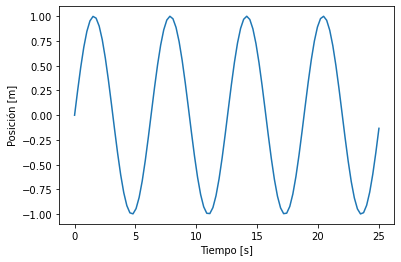

In [7]:
plot(tiempo,solucion[:,0])
xlabel("Tiempo [s]")
ylabel("Posición [m]")

Ahora hacemos un gráfico de la velocidad de la masa en tiempo.

Text(0, 0.5, 'Velocidad [m/s]')

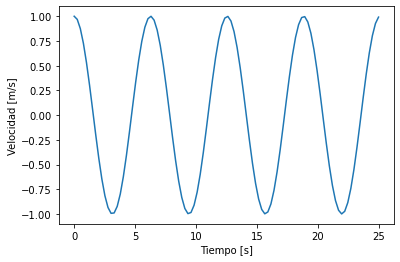

In [8]:
plot(tiempo,solucion[:,1])
xlabel("Tiempo [s]")
ylabel("Velocidad [m/s]")

Este es una simulación computacional! Tenemos una solución a las ecuaciones del sistema que hemos obtenido en forma *numérica* (y no analítica).

De hecho, podemos resolver la ecuación diferencial analíticamente. Podemos ver la solución utilizando otro módulo de Python, *Sympy*.

Podemos escribir la ecuación diferencial en otra forma:

$$m\frac{d^2x}{dt^2} = -kx$$

$$\rightarrow \quad \ddot{x} + \omega_0^2 x = 0$$

donde $\omega_0^2 = k/m$

In [9]:
# Ahora usamos Sympy para determinar la solución en una manera *analítica*

import sympy
sympy.init_printing()

Vamos a simplificar la ecuación un poco. Elegimos $k = 1$ y $m = 1$ para eliminar estas variables.

In [10]:
t = sympy.symbols('t')
x = sympy.Function('x')

In [11]:
sol = sympy.dsolve(sympy.Derivative(x(t), t, 2) + x(t))
sol

Esta es la solución general a la ecuación differential de segundo orden (con $\omega_0^2 = 1$). Se puede determinar las constantes $C_1$ y $C_2$ por las condiciones iniciales:

$$x(0) = 0, \quad v(0) = 1$$

La velocidad es la derivada del lado derecho arriba con respecto al tiempo:

In [12]:
sympy.diff(sol.rhs, t)

$$v(t) = C_1 \cos(t) - C_2 \sin(t)$$

Entonces,

$$x(0) = C_2 = 0$$

$$v(0) = C_1 = 1$$

La posición como función del tiempo es

$$x(t) = \sin(t)$$

y la velocidad es

$$v(t) = \cos(t)$$

Podemos comprobar nuestro resultado numérico con el resultado analítico.

Text(0, 0.5, 'Posición [m]')

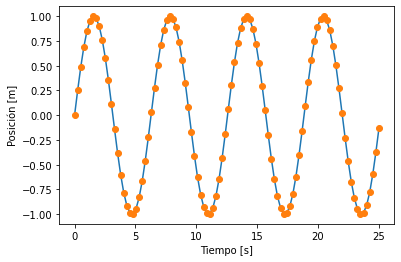

In [13]:
plot(tiempo,solucion[:,0])
plot(tiempo,sin(tiempo),'o')
xlabel("Tiempo [s]")
ylabel("Posición [m]")

Text(0, 0.5, 'Velocidad [m]')

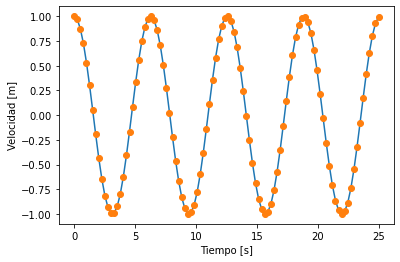

In [14]:
plot(tiempo,solucion[:,1])
plot(tiempo,cos(tiempo),'o')
xlabel("Tiempo [s]")
ylabel("Velocidad [m]")

### Otro método: diferencias finitas

Ahora vamos a ver un método muy útil que se puede aplicar a *cualquier* ecaución diferencial. El método se llama **diferencias finitas**.

Este método está ocupado en simulaciones de la relatividad general, simulaciones cosmológicas, del clima, etc.

Consideremos la definición fundamental de una derivada:

$$\frac{dx}{dt} = \lim_{h \to 0} \left(\frac{x(t+h) - x(t)}{h}\right)$$

Podemos aproximar la derivada numéricamente usando un valor muy pequeño (pero no nulo) del parámetro $h$:

$$\frac{dx}{dt} \approx \left(\frac{x(t+h) - x(t)}{h}\right)$$

El valor $h$ es la *resolución* de la malla computacional en el tiempo:

| ![](clase1_imagenes/finite_diff.png) |
|------------------------------------|
| Discretización del tiempo        |

Podríamos aplicar exactamente el mismo método a una derivada espacial, por ejemplo $\frac{dy}{dx}$. Eso correspondería a una discretización del espacio.

Entonces, evaluamos la derivada usando solamente los puntos $x(t_i)$, que están separados por una distancia $h$.

Podemos escribir estos puntos así:

$$x_i = x(t_i)$$

Entonces tenemos $x(t_i + h) = x_{i+1}$.

Por lo tanto, la aproximación de la derivada, en el punto $t_i$ se puede escribir como

$$\frac{dx}{dt}(t_i) = \frac{x_{i+1} - x_i}{h}$$

Esta aproximación se llama una diferencia **adelantada**, porque depende del valor de $x$ en el momento $t_i$ y en el siguiente momento $t_{i+1}$.

##### Las ecuaciones del oscilador armónico simple de nuevo

Volvemos a las ecuaciones (de primer orden) para el oscilador armónico simple:

$$\frac{dx}{dt} = v$$

$$\frac{dv}{dt} = -\frac{k}{m}x$$

Usando el método de diferencias finitas, podemos aproximar estas ecuaciones con:

$$\frac{dx}{dt}(t_i) = v_i = \frac{x_{i+1} - x_i}{h}$$

$$\frac{dv}{dt}(t_i) = \frac{v_{i+1} - v_i}{h} = -\frac{k}{m}x_i$$

Lo que tenemos ahora es un par de *relaciones de recurrencia*:

$$x_{i+1} = hv_i + x_i$$

$$v_{i+1} = -\frac{k}{m}hx_i + v_i$$

Las condiciones iniciales definen los valores de $x_0$ y $v_0$. Entonces, podemos calcular $x_1$ y $v_1$ (sus valores en el próximo *paso de tiempo*) con:

$$x_1 = hv_0 + x_0$$

$$v_1 = -\frac{k}{m}hx_0 + v_0$$

Después de este cálculo, podemos obtener los valores de $x$ y $v$ en el próximo paso del tiempo con

$$x_2 = hv_1 + x_1$$

$$v_2 = -\frac{k}{m}hx_1 + v_1$$

Y así sigue...

Ahora vamos a escribir un programa de Python para calcular estos valores!

Primero, tenemos que decidir en los valores de algunos parámetros:

* Tiempo total de la simulación. Vamos a elegir el mismo tiempo total como antes: 25 segundos.
* Tamaño del salto del tiempo (valor de $h$): si este valor es demasiado grande la aproximación a la derivada es muy imprecisa. Si el valor es muy pequeño la simulación demorará mucho tiempo y/o ocupará mucha memoria.

In [15]:
tiempo_total = 25.0
h = 0.1

El número de pasos total de la simulación será el tiempo total dividido por el intervalo de cada paso. 

Hacemos una conversión de un número real a un número entero, porque usaremos este valor para especificar el número de elementos que queremos en los arreglos que guardan los valores de $x$, $v$.

In [16]:
pasos_del_tiempo = int(tiempo_total/h)

In [17]:
x = zeros(pasos_del_tiempo)
v = zeros(pasos_del_tiempo)

Asignamos valores a los parámetros $k$ y $m$ como antes:

In [18]:
k = 1.0
m = 1.0

Por las condiciones iniciales del problema, ya sabemos los valores del primer elemento de cada arreglo:

In [19]:
x[0] = 0.0
v[0] = 1.0

Ahora tenemos un ciclo *for* para tener una iteración sobre todos los pasos del tiempo. Usamos una variable $i$ en el ciclo. Esta variable será el índice para los arreglos `x` y `v`.

Necesitamos que $i$ tome valores entre $1$ y el número total de pasos del tiempo.

El ciclo comienza en $i=1$, porque ya tenemos los valores para $i=0$ (las condiciones iniciales).

En cada iteración calculamos los nuevos valores de $x$ y $v$ en el momento $t = t_i$.

In [20]:
for i in range(1,pasos_del_tiempo):
    x[i] = h*v[i-1] + x[i-1]
    v[i] = -(k/m)*h*x[i-1] + v[i-1]

Para hacer los gráficos, necesitamos los valores del tiempo que hemos usado. Hay una función en NumPy, `arange`, que crea un arreglo de números enteros hasta un máximo.

Si tenemos un arreglo de números enteros que representan los pasos del tiempo, podemos multiplicarlo por $h$ para tener los valores de $t$ en cada momento.

In [21]:
tiempo = arange(pasos_del_tiempo)*h

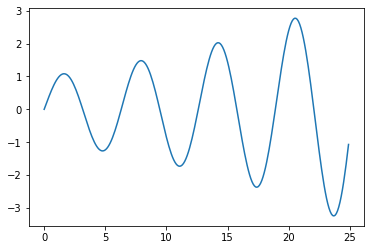

In [22]:
plot(tiempo,x)

Las oscilaciones crecen! Pero sabemos de la solución analítica (la solución exacta) que deberíamos tener la función $\sin(t)$ como solución.

¿Qué pasó?

Hay que acordar que estamos aproximando las derivadas con diferencias finitas. Podemos mejorar la aproximación con un valor más pequeño de $h$.

Si vamos a cambiar parámetros y ejecutar el mismo código de nuevo, sería mejor definir una función:

In [23]:
def dif_finita_OAS(tiempo_total,h,k,m,x0,v0):

    pasos_del_tiempo = int(tiempo_total/h)

    x = zeros(pasos_del_tiempo)
    v = zeros(pasos_del_tiempo)

    x[0] = x0
    v[0] = v0

    for i in range(1,pasos_del_tiempo):
        x[i] = h*v[i-1] + x[i-1]
        v[i] = -(k/m)*h*x[i-1] + v[i-1]
    
    tiempo = arange(pasos_del_tiempo)*h
    return( tiempo, x, v )

In [24]:
t, x, v = dif_finita_OAS(25.0, h=0.1, k=1.0, m=1.0, x0=0.0, v0=1.0)

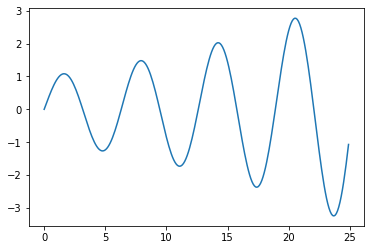

In [25]:
plot(t,x)

In [26]:
t, x, v = dif_finita_OAS(25.0, h=0.01, k=1.0, m=1.0, x0=0.0, v0=1.0)

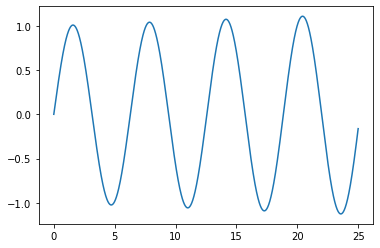

In [27]:
plot(t,x)

Este es mejor, pero todavía hay un crecimiento de la amplitud. De hecho, la aproximación que hemos usado para la derivada es bastante mala, y nunca tendremos una solución muy precisa.

Pero hay un número infinito de posibles aproximaciones a una derivada con diferencias finitas! Hemos elegido la más simple, pero la menos precisa.

#### Diferencias finitas: una mejor aproximación

La aproximación de diferencias finitas que usabamos es:

$$\left(\frac{dx}{dt}\right)_f \approx \frac{x(t+h) - x(t)}{h}$$

Podemos usar una expresión similar en el caso de considerar un punto en la otra dirección simplemente por reemplazar $h$ con $-h$:

$$\left(\frac{dx}{dt}\right)_b \approx \frac{x(t-h) - x(t)}{-h} = \frac{x(t) - x(t-h)}{h}$$

Usamos el valor promedio de estas dos aproximaciones:

$$\frac{1}{2}\left(\frac{dx}{dt}\right)_f + \frac{1}{2}\left(\frac{dx}{dt}\right)_b = \frac{x(t+h) - x(t-h)}{2h}$$

Esta aproximación se llama la *diferencia centrada*. Ahora podemos usar esta aproximación en el programa.

$$\frac{dx}{dt} = \frac{x_{i+1} - x_{i-1}}{2h} = v_i$$

$$\frac{dv}{dt} = \frac{v_{i+1} - v_{i-1}}{2h} = -\frac{k}{m}x_i$$

Reorganizando estas ecuaciones, tenemos:

$$x_{i+1} = 2hv_i + x_{i-1}$$

$$v_{i+1} = -2h\frac{k}{m}x_i + v_{i-1}$$

Ahora tenemos un problema: para calcular $x_1$ y $v_1$ parece que necesitamos los valores $x_{-1}$ y $v_{-1}$, que no existen!

Por eso, usamos de nuevo la aproximación anterior para calcular los valores de $x_1$ y $v_1$:

$$x_1 = hv_0 + x_0$$

$$v_1 = -\frac{k}{m}hx_0 + v_0$$

Después de eso, podemos calcular $x_2$ y $v_2$ con la nueva aproximación:

$$x_{2} = 2hv_1 + x_{0}$$

$$v_{2} = -2h\frac{k}{m}x_1 + v_{0}$$

y los valores de $x_3$ y $v_3$:

$$x_{3} = 2hv_2 + x_{1}$$

$$v_{3} = -2h\frac{k}{m}x_2 + v_{1}$$

y sigue así...

Podemos cambiar los índices en las relaciones de recurrencia para tener algo más parecido al programa que escribiremos:

$$x_{i} = 2hv_{i-1} + x_{i-2}$$

$$v_{i} = -2h\frac{k}{m}x_{i-1} + v_{i-2}$$

Definimos otra función:

In [28]:
def dif_finita_OAS_2(tiempo_total,h,k,m,x0,v0):

    pasos_del_tiempo = int(tiempo_total/h)

    x = zeros(pasos_del_tiempo)
    v = zeros(pasos_del_tiempo)

    x[0] = x0
    v[0] = v0

    ## Calculamos los valores de x_1, v_1 con la
    ## aproximación que vimos antes
    x[1] = h*v[0] + x[0]
    v[1] = -(k/m)*h*x[0] + v[0]
    
    ## El ciclo comienza en 2 ahora!
    for i in range(2,pasos_del_tiempo):
        x[i] = 2*h*v[i-1] + x[i-2]
        v[i] = -(k/m)*2*h*x[i-1] + v[i-2]
    
    tiempo = arange(pasos_del_tiempo)*h
    return( tiempo, x, v )

Vamos a probar esta versión del programa con el valor original de $h$, $h = 0.1$:

In [29]:
t2, x2, v2 = dif_finita_OAS_2(25.0,h=0.1,k=1.0,m=1.0,x0=0.0,v0=1.0)

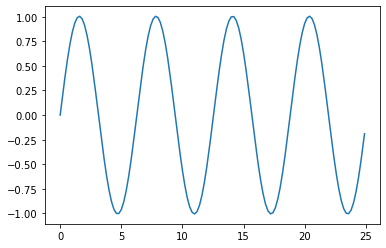

In [30]:
plot(t2,x2)

In [31]:
t, x, v = dif_finita_OAS(25.0,h=0.1,k=1.0,m=1.0,x0=0.0,v0=1.0)

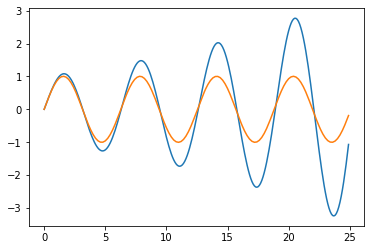

In [32]:
plot(t,x)
plot(t2,x2)

### Ejemplos del método de diferencias finítas: péndulos

In [33]:
%%HTML
<div align="middle">
<video width="100%" controls>
      <source src="clase1_imagenes/single_pendulum.mp4" type="video/mp4">
</video></div>

In [34]:
%%HTML
<div align="middle">
<video width="100%" controls>
      <source src="clase1_imagenes/simple_pendulum_error.mp4" type="video/mp4">
</video></div>

In [35]:
%%HTML
<div align="middle">
<video width="100%" controls>
      <source src="clase1_imagenes/double_pendulum.mp4" type="video/mp4">
</video></div>

Hemos visto que podríamos resolver las ecuaciones diferenciales de un oscilador armónico simple analíticamente. Por lo tanto, no necesitamos una simulación numérica.

En el caso de ecuaciones diferenciales más complicadas (o cuando el sistema tienen muchos componentes) necesitamos las simulaciones.

Las ecuaciones de la relatividad general, por ejemplo, son **no-lineales** y así son muy difíciles de resolver.

Incluso las ecuaciones de la gravedad de Newton, en el caso de más que $2$ partículas, no tienen una solución exacta: hay que resolverlas numericamente.

Aunque la función `odeint` que usabamos funciona muy bien para ecuaciones diferenciales simples, no sirve para ecuaciones más complicadas, por ejemplo las ecuaciones diferenciales *parciales* que aparacen todo el tiempo en la física.

El método de **diferencias finitas**, por otra parte, aplica a *cualquier* sistema de ecuaciones diferenciales, y por eso es muy utilizado en simulaciones.

## Métodos de Monte Carlo

En la física cuántica es muy común usar el método de Monte Carlo. Este método utiliza números aleatorios para evaluar integrales.

Por eso recibe su nombre por un casino famoso en Mónaco:

![](clase1_imagenes/monte_carlo.jpg)

En la física cuántica, las posiciones de las partículas no están totalmente localizadas: 
* Pueden no solamente seguir un camino en el espacio entre dos puntos.
* También puede que tomen **todos** los caminos entre dos puntos!

<img style="float: center;" src="clase1_imagenes/path_integral.jpg " alt="alt text" width="300" height="300" class="blog-image">

En la física estadística, también tratamos el sistema de forma probabilistica porque hay tantas partículas que es imposible analizarlas individualmente.

Por estas razones, los métodos de Monte Carlo son muy utilizados en estudios del comportamiento de la materia al nivel microscópico.

### Cálculos en la física cuántica o estadística

Típicamente en la física cuántica o estadística, queremos calcular **valores promedios** de algunas propiedades del sistema. Por ejemplo, el valor promedio de la energía de todas las partículas.

Matemáticamente, calcular un promedio corresponde a la **evaluación de una integral**. En un sistema como el núcleo de un átomo, las integrales que tenemos que evaluar típicamente son muy complicadas y multidimensionales.

##### Las integrales

Se puede interpretar una integral como el área debajo de una curva:

![](clase1_imagenes/Integral_example.png)

Numéricamente podemos aproximar las integrales con muchas divisiones del área en rectángulos. Así el problema se reduce al sumatorio de las áreas de muchos rectángulos. Aquí está un ejemplo en una dimensión:

![](clase1_imagenes/integral_approx.png)

De hecho con un procedimiento así uno puede **definir** la integral de una función. Se encuentra el valor exacto de la integral en el límite de un número infinito de rectángulos con anchos infinitesimalmente pequeños.

Como lo que vimos para las derivadas (valores de $h$ pequeños pero no nulos), es posible aproximar una integral numéricamente por el uso de rectángulos muy estrechos, pero todavía con tamaño finito.

Entonces, puede ser que podemos tener una aproximación aceptable de la integral de una función con $1000$ rectángulos, por ejemplo.

También se puede definir la integración en más dimensiones. Por ejemplo, se puede determinar el volumen de una forma geométrica:

![](clase1_imagenes/vol_integral.jpg)

* Supogamos que necesitamos $1000$ divisiones en cada dimensión para calcular una integral de un volumen en $3$ dimensiones a una precisión aceptable. 

* Esto corresponde a $1000^3 = 10^9$ cubitos!

* En la física cuántica y estadística es común tener integrales de $10^6 - 10^9$ **dimensiones**! 

* Es totalmente imposible evaluar una integral así con los métodos normales de dividir el "volumen" en muchos "cubitos" pequeños.

* Pero, hay otro método que sirve - el **Método de Monte Carlo**.

### Ejemplo: calculando el valor de $\pi$ con un método de Monte Carlo

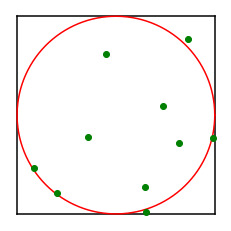

In [36]:
axis("off")
plot([-1.0,-1.0],[-1.0,1.0],'k-')
plot([1.0,1.0],[-1.0,1.0],'k-')
plot([-1.0,1.0],[1.0,1.0],'k-')
plot([-1.0,1.0],[-1.0,-1.0],'k-')
theta = linspace(0.0,2*pi,1000)
gca().set_aspect('equal', adjustable='box')
plot(cos(theta),sin(theta),'r-')
x = random.uniform(low=-1.0,high=1.0,size=10)
y = random.uniform(low=-1.0,high=1.0,size=10)
plot(x,y,'go')

Tenemos un círculo con radio $r$ dentro de un cuadrado, donde cada lado tiene longitud $2r$:

![](circlesquare1.png)

El área del círculo es $M = \pi r^2$ y el área del cuadrado es $N = 4r^2$. Entonces tenemos:

$$\frac{M}{N} = \frac{\pi}{4}$$

Así que $\pi$ está dado por $\pi = 4M/N$.

#### Estimando el área del círculo con números aleatorios

Ahora podemos elegir números aleatorios entre $-1$ y $1$ para las coordenadas $x$ y $y$. Estos puntos estarán siempre dentro del cuadrado, pero no siempre dentro del círculo:

<img style="float: right;" src="clase1_imagenes/circlesquare2.png">

La probabilidad de tener un punto dentro del círculo es proporcional al área del círculo: $p_{circ} \propto M$. También, la probabilidad de tener un punto dentro del cuadrado es proporcional al área del cuadrado: $p_{cuad} \propto N$. Por lo tanto, tenemos:

$$\frac{p_{circ}}{p_{cuad}} = \frac{M}{N}$$

<img style="float: right;" src="clase1_imagenes/circlesquare2.png">

De hecho, elegimos puntos que *siempre* están dentro del cuadrado, así que $p_{cuad} = 1$, y $p_{circ} = M/N$.

Si tenemos $n$ puntos en total, la probabilidad de tener $m$ puntos dentro del círculo está dada por $p_{circ} = m/n$. Por ende, tenemos una relación entre el número de puntos y los áreas:

$$\frac{m}{n} = \frac{M}{N}$$

Vamos a usar está relación para estimar el valor de $\pi$.

Primero, generamos $10$ números aleatorios entre $-1$ y $1$ que son las coordenadas en $x$ (dentro del cuadrado):

In [37]:
x = random.uniform(low=-1.0,high=1.0,size=10)

Ahora generamos $10$ números aleatorios más dentro el mismo rango para las coordenadas $y$:

In [38]:
y = random.uniform(low=-1.0,high=1.0,size=10)

Calculamos el radio de todos los puntos.

In [39]:
r = sqrt(x**2 + y**2)

In [40]:
sympy.init_printing(pretty_print=False)

Comparamos estos radios con el radio del círculo (que es $r = 1$). Si su radio es mayor que $1$, ese punto no está dentro del círculo.

In [41]:
r

array([1.00140469, 0.42785945, 0.75746041, 0.94514699, 1.16043862,
       0.94418849, 0.88212057, 0.78589226, 0.43440327, 1.19363669])

Hay algunos valores mayor que $1$. Podemos calcular cuantos por el uso de un arreglo *Booleano*.

In [42]:
r > 1.0

array([ True, False, False, False,  True, False, False, False, False,
        True])

In [43]:
sum(r > 1.0)

3

La sumatoria de un arreglo Booleano solamente cuenta los valores de *True* (verdad).

Entonces, el número total de puntos dentro del círculo está dado por:

In [44]:
sum(r <= 1.0)

7

Ahora, calculamos la razón entre el número de puntos dentro del círculo y el número total.

In [45]:
sum(r <= 1.0)/len(r)

0.7

Este es el valor de $M/N$ (para solamente $10$ puntos). El valor de $\pi$ está dado por $4M/N$:

In [46]:
4.0*sum(r <= 1.0)/len(r)

2.8

El resultado no es muy preciso... Podemos usar más números aleatorios. Ahora hacemos un ciclo para ver como el resultado mejora con más números aleatorios. Primero, definimos una lista de números totales de puntos que usaremos en cada ciclo:

In [47]:
numeros_totales = [x for x in range(100,10100,100)]

In [48]:
numeros_totales

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000]

Creamos una lista vacía para guardar los resultados de cada cálculo del valor de $\pi$.

In [49]:
resultados = []

Ahora estimamos el valor de $\pi$ con diferentes números totales de puntos aleatorios.

In [50]:
for n in numeros_totales: # Ciclo sobre todos los valores de "n"
    x = random.uniform(low=-1.0,high=1.0,size=n) #n números aleatorios para x
    y = random.uniform(low=-1.0,high=1.0,size=n) #n números aleatorios para y
    r = sqrt(x**2 + y**2) #Los radios de los puntos
    m = sum(r <= 1.0) #Cuantos puntos hay dentro del círculo, el valor "m"
    resultados.append( 4.0*m/n ) #Agregamos el valor estimado de pi

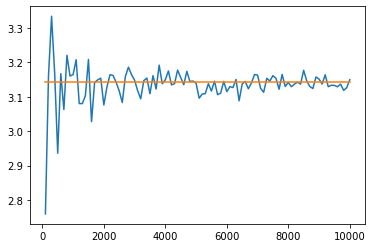

In [51]:
plot(numeros_totales,resultados)
plot([numeros_totales[0],numeros_totales[-1]],[pi,pi])

Vemos que la aproximación al valor de $\pi$ mejora a medida que consideramos más números aleatorios.

#### Resumen: simulaciones de Monte Carlo

* Lo que hicimos en este ejemplo fue evaluar una integral de *volumen* (en $2$ dimensiones, así que es un *área*) con números aleatorios. Este es un ejemplo de integración de Monte Carlo.

* También podemos usar números aleatorios para *simular* sistemas físicos. Esto es muy útil en la física estadística y la física cuántica. Un ejemplo sería una simulación de Monte Carlo para calcular la energía promedio de un gas cuántico.

#### Una nota sobre números aleatorios

* Los computadores son sistemas *deterministas*. Los algoritmos también son deterministas. Este significa que no podemos usar un algoritmo computacional para generar números que son verdaderamente aleatorios.

* Lo que podemos hacer es generar números *pseudo-aleatorios*. Estos son números que parecen aleatorios, aunque están generados por un algorítmo determinista.

Hay más información en Wikipedia:

https://es.wikipedia.org/wiki/Generador_de_números_pseudoaleatorios

# Resumen

* La física se trata de la aplicación de ecuaciones matemáticas a la naturaleza.
* La mayoría de los sistema físicos reales se describen mediante ecuaciones que no pueden resolverse analíticamente ("con lápiz y papel").
* Sin embargo, **sí** podemos resolverlos numéricamente con una simulación computacional.
* Hay varias técnicas para hacer simulaciones, por ejemplo: diferencias finitas, Monte Carlo, ... .